# FLIP ROBO TECHNOLOGIES

# NAME: GAURAV PAREEK

# BATCH: DS2308

# Third-Phase-Practice-Projects--1-


Glass Identification
Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
•	https://github.com/dsrscientist/dataset3


In [2]:
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')


from collections import Counter

import pandas as pd 
 # read and wrangle dataframes


import matplotlib.pyplot as plt
 # visualization

import seaborn as sns 
# statistical visualizations and aesthetics

from sklearn.base import TransformerMixin 
# To create new classes for transformations

from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
# preprocessing 

from sklearn.decomposition import PCA 
# dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
# data transform

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# model selection modules

from sklearn.pipeline import Pipeline
 # streaming pipelines

from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class

from collections import Counter
import warnings

In [3]:
df=pd.read_csv('glass.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
header_names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df=pd.read_csv('glass.csv',header=None,names=header_names)

In [6]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.isnull().sum()

Id number    0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
Type         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(214, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [11]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes
are numerical. Even the type which is categorical in nature is represented as integers.
Please note there is no order among the classes.


Exploratory Data Analyses

Let us check how many instances of each type are there in our dataset


Text(0.5, 1.0, 'Count of Glass Types')

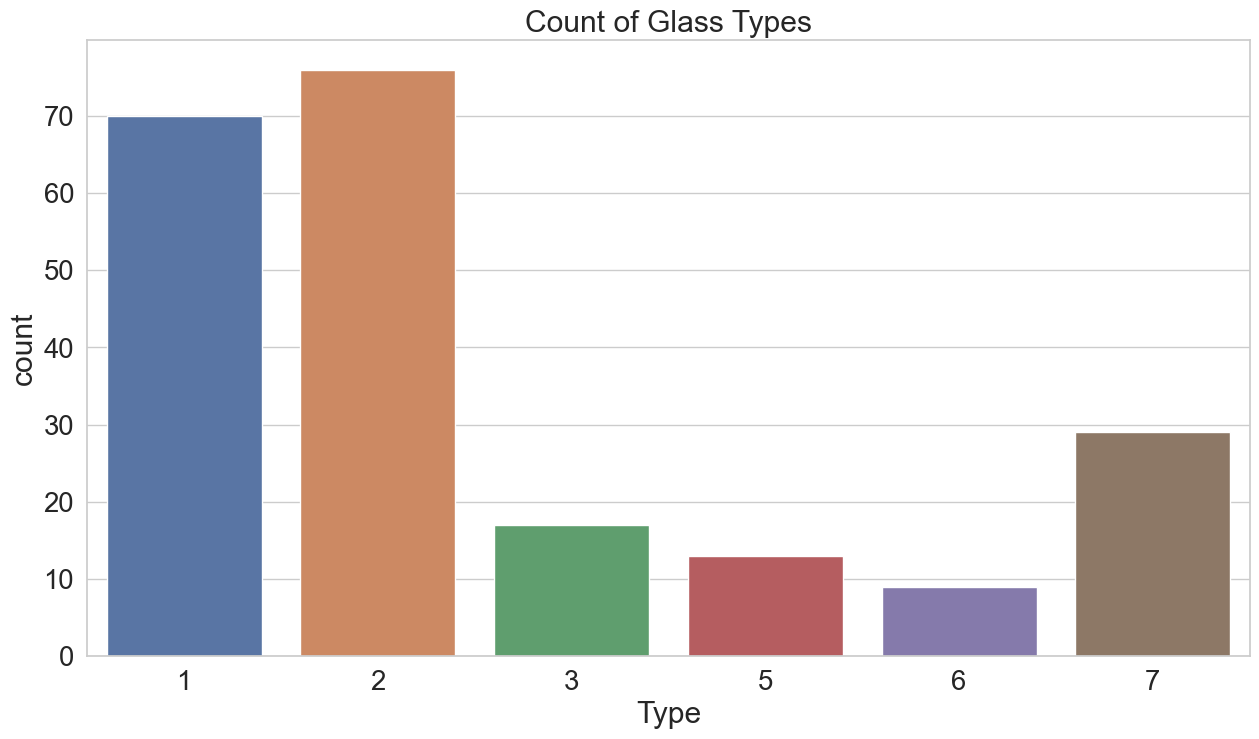

In [12]:


sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=df).set_title('Count of Glass Types')





We see that Type 2 and 1 have the highest occurences in the dataset, so we need to make sure that the train and test 
dataset have a good representation from all the types. The dataset source is forensic sciences department and probably 
the reason of the high count of type 1 & 2 is that many criminals break through building window glasses at the scene rather
than breaking containers or tableware.


In [13]:


# Checked both mean and median. mean seemed more informative
df.groupby('Type', as_index=False).mean()



,Type,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,35.5,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


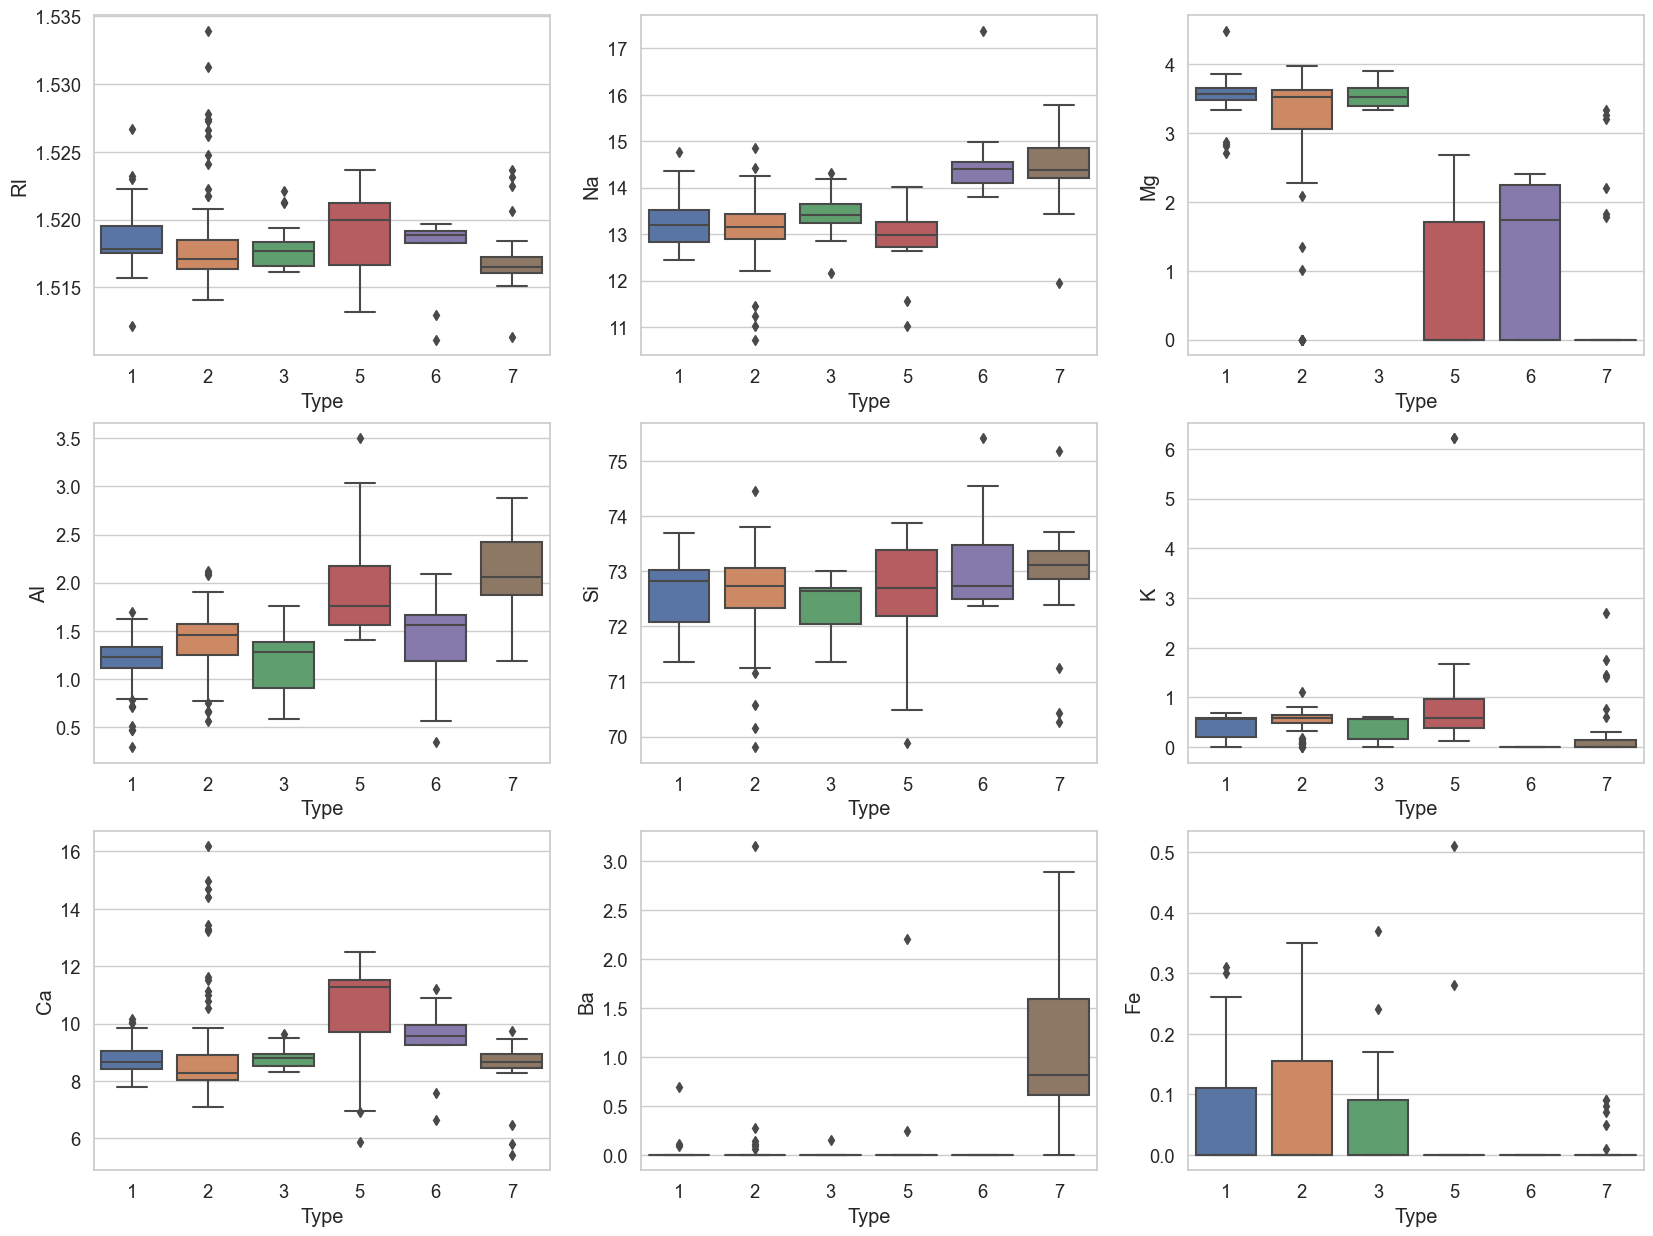

In [14]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=df)
plt.show()

The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and 
slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. 
Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest 
concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. 
But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is
highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values 
for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the 
relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)


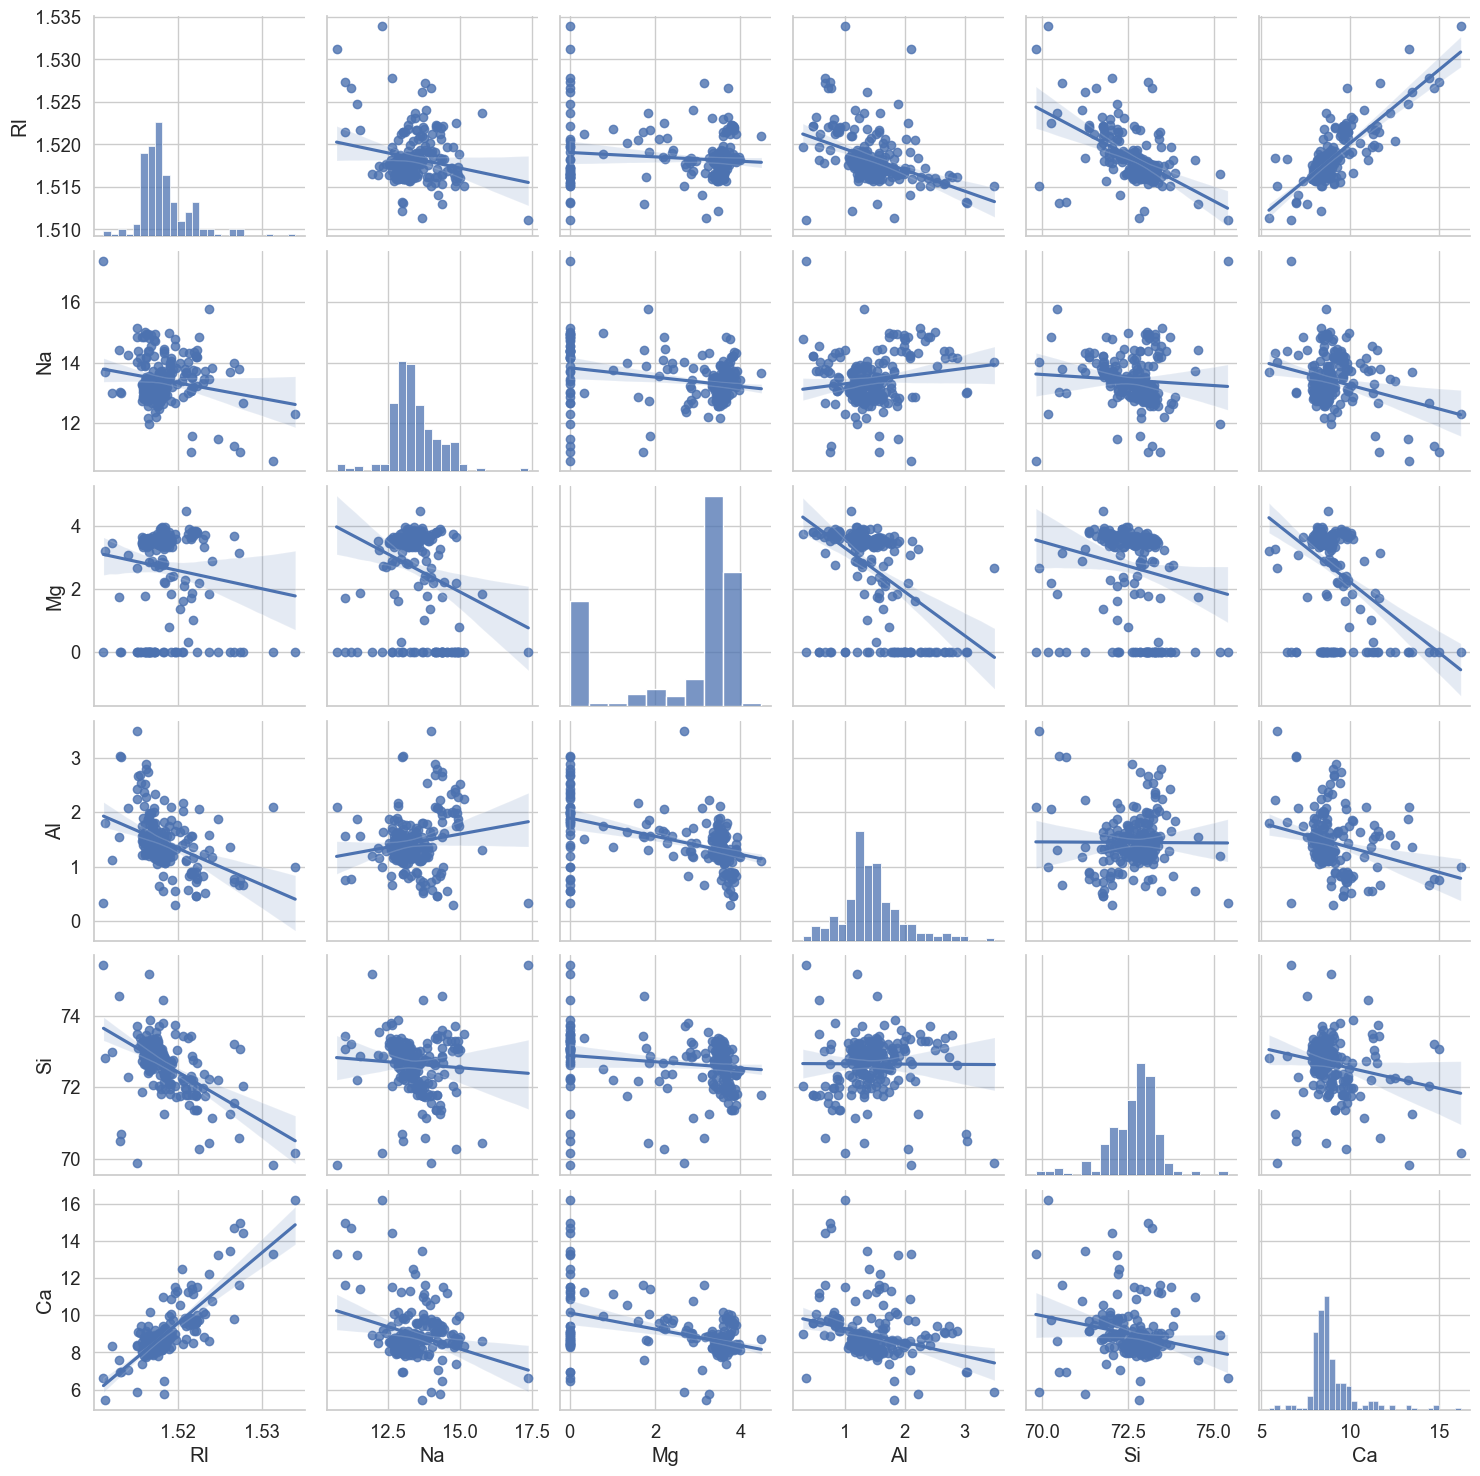

In [15]:


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')





On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium 
and Refractive index. Silica and RI seem to have an inverse relationship.

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. 
Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on
some of the properties.


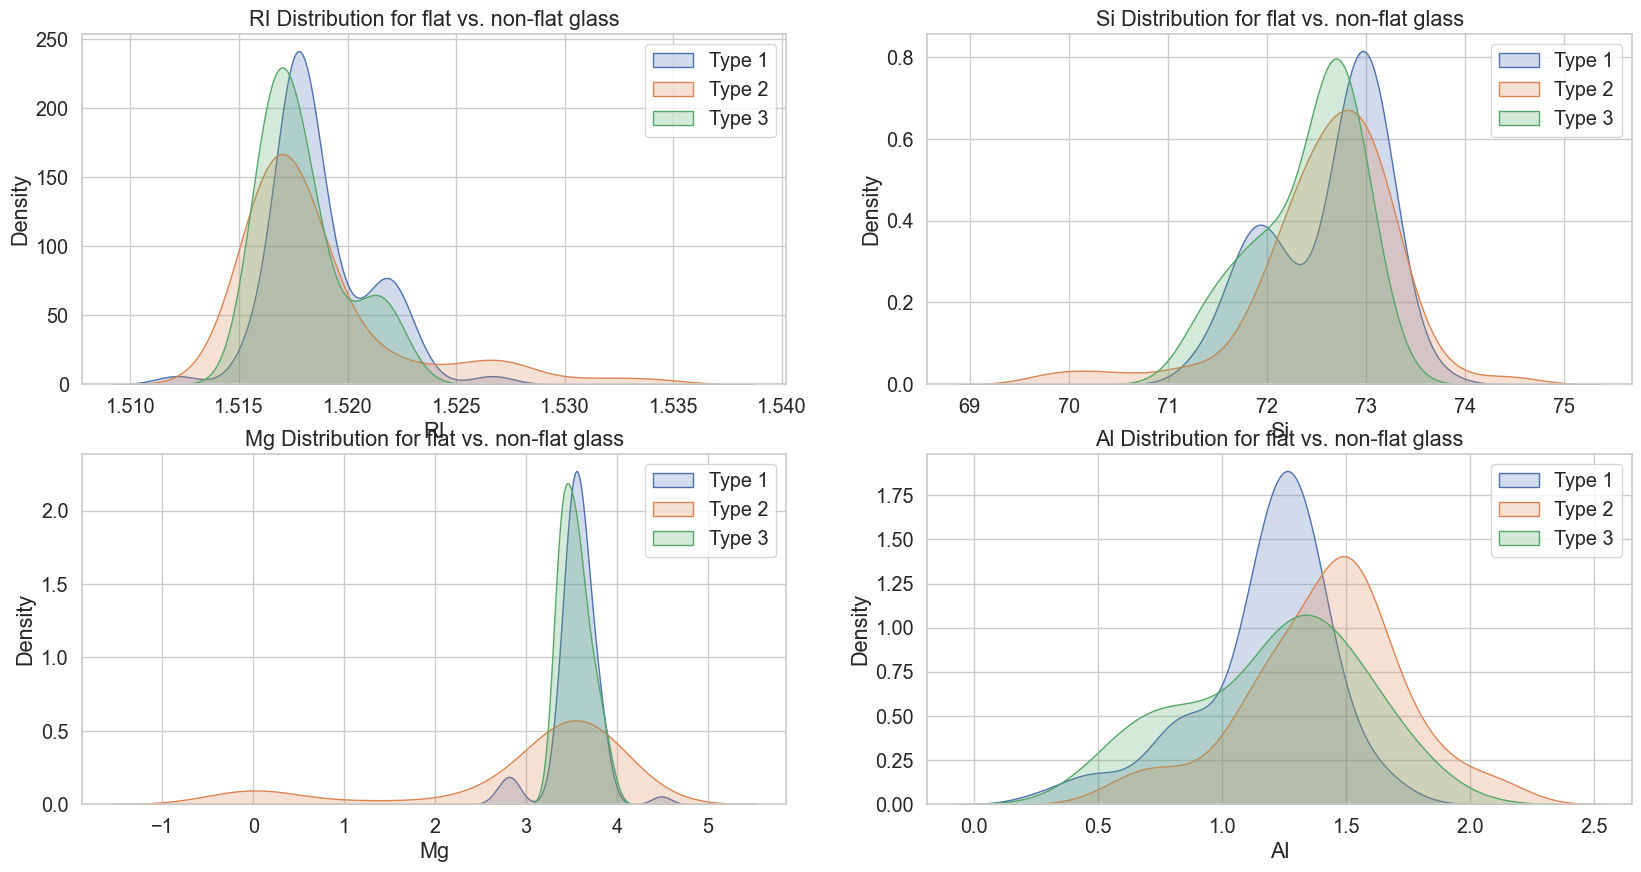

In [16]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df["RI"][df.Type == 1], shade = True)
sns.kdeplot(df["RI"][df.Type == 2], shade = True)
sns.kdeplot(df["RI"][df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(df["Si"][df.Type== 1], shade = True)
sns.kdeplot(df["Si"][df.Type == 2], shade = True)
sns.kdeplot(df["Si"][df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(df["Mg"][df.Type == 1], shade = True)
sns.kdeplot(df["Mg"][df.Type == 2], shade = True)
sns.kdeplot(df["Mg"][df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(df["Al"][df.Type == 1], shade = True)
sns.kdeplot(df["Al"][df.Type == 2], shade = True)
sns.kdeplot(df["Al"][df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 
than type 1. The non-float glass, type 2 has many extreme points which make its
range very high.


Feature Selection using PCA

Let us plot a correlation heatmap to identify multicollinearity


<AxesSubplot:>

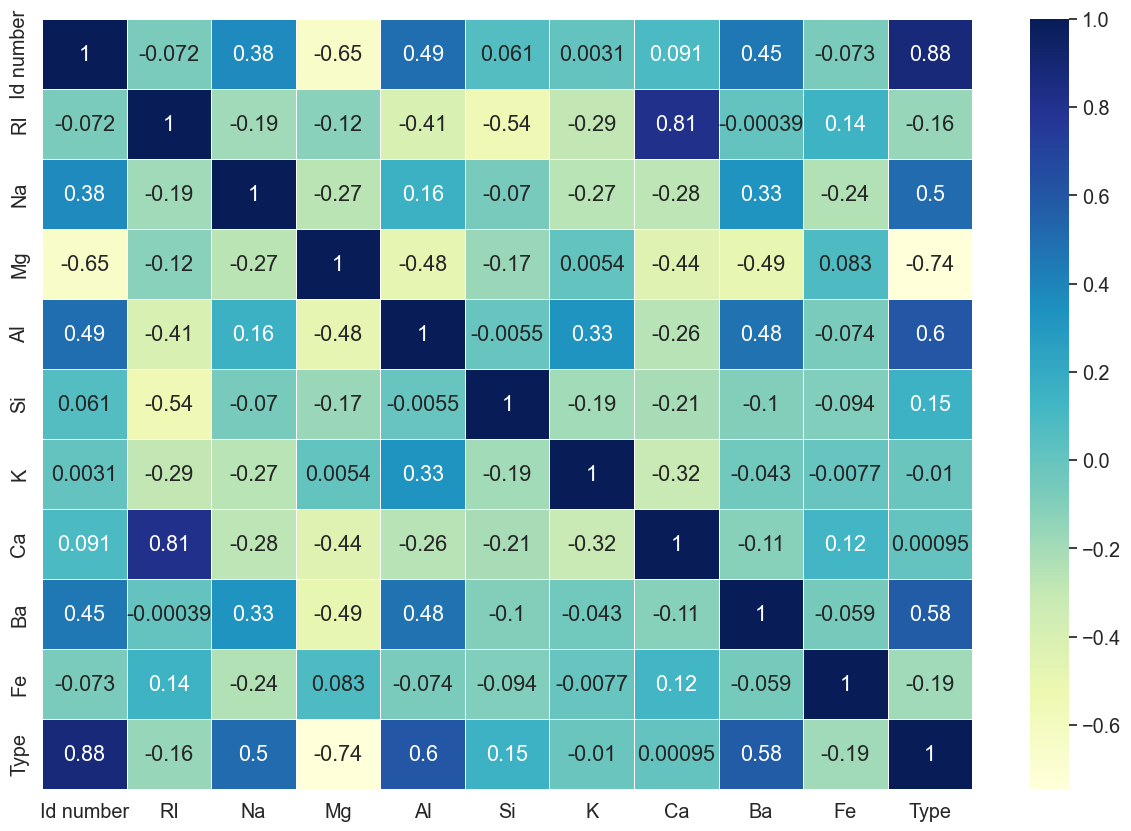

In [17]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)


Data Visualization


1. Using Univariate Plots

In [18]:


# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = df[features]

y = df[label]
     


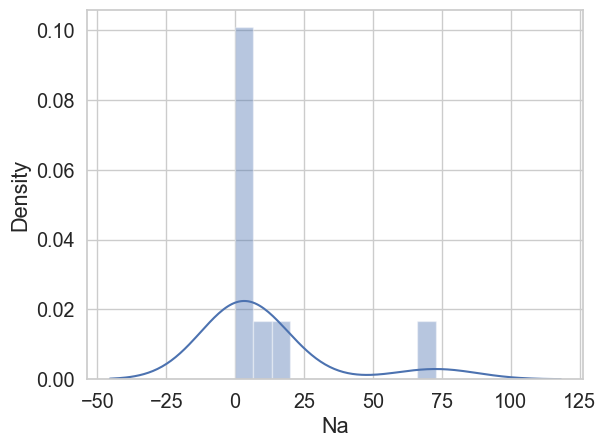

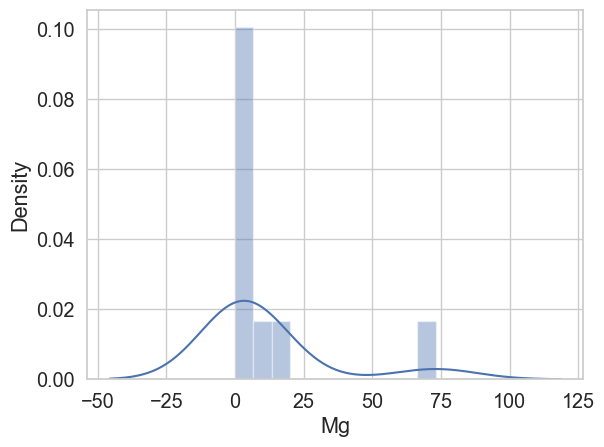

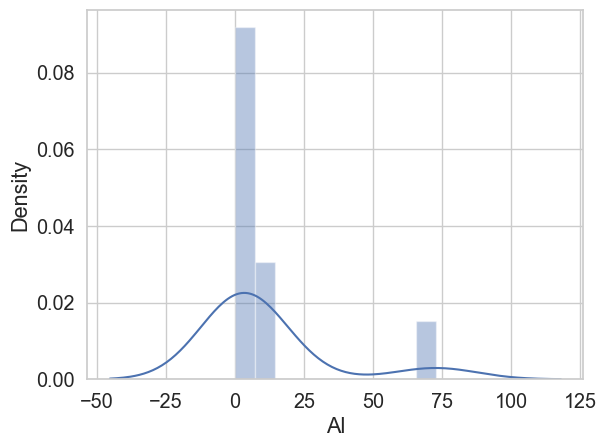

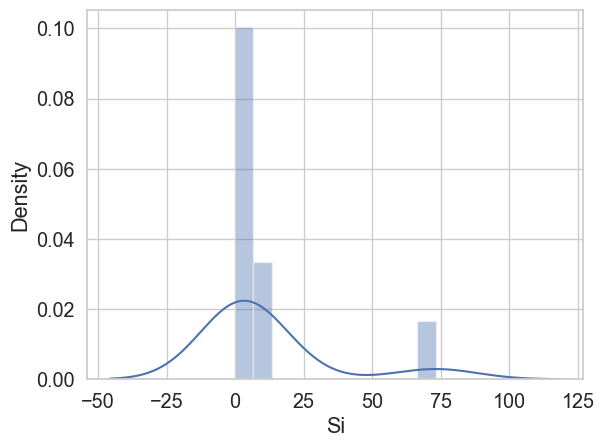

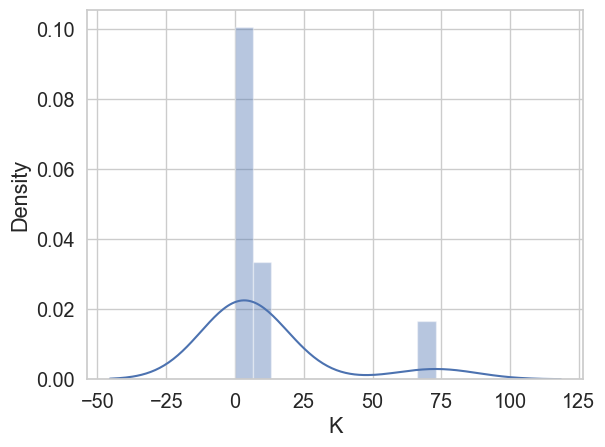

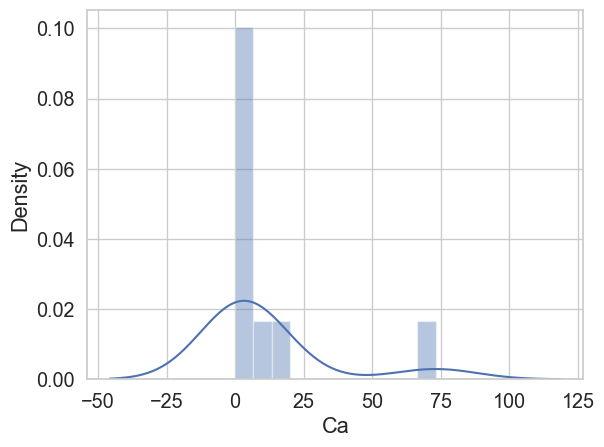

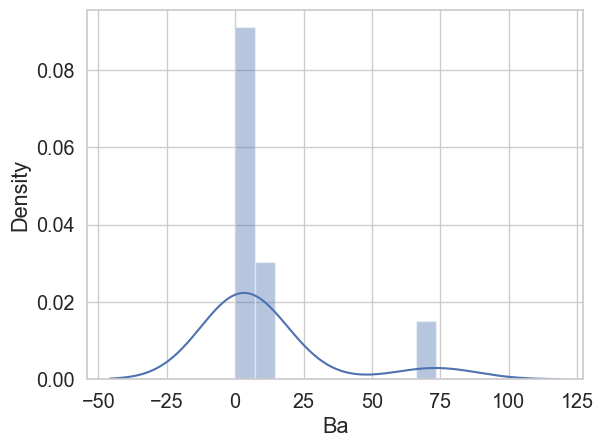

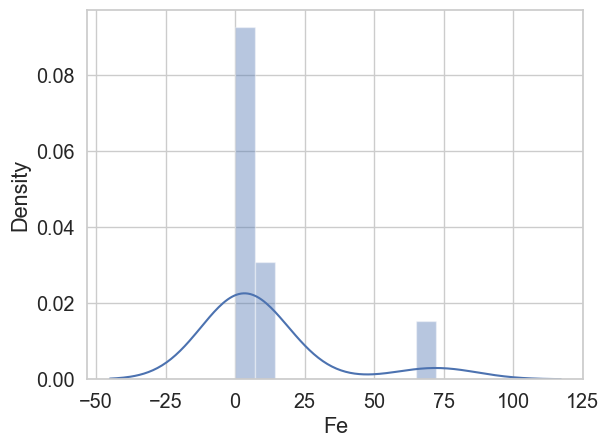

In [19]:


x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()
     




Outcomes

    Our dataset is skewed either on positive side or negative side and data is not normalized



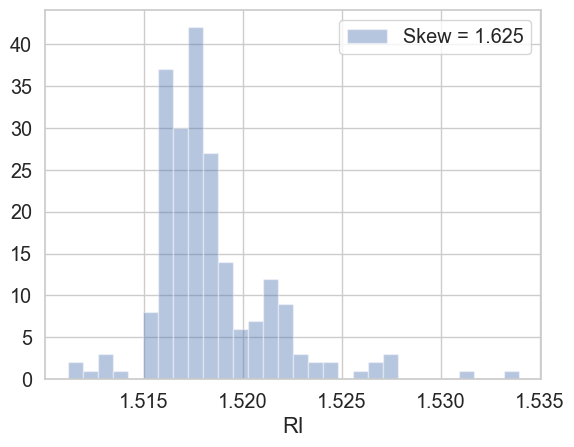

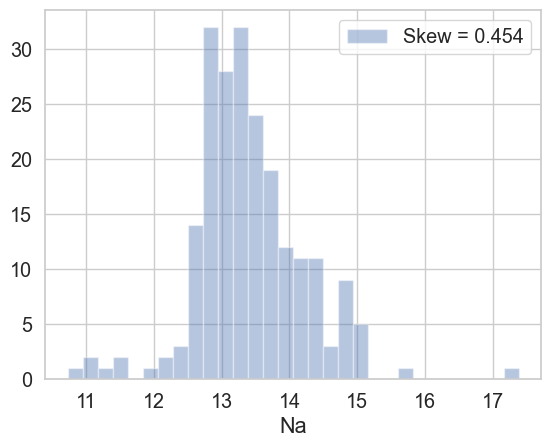

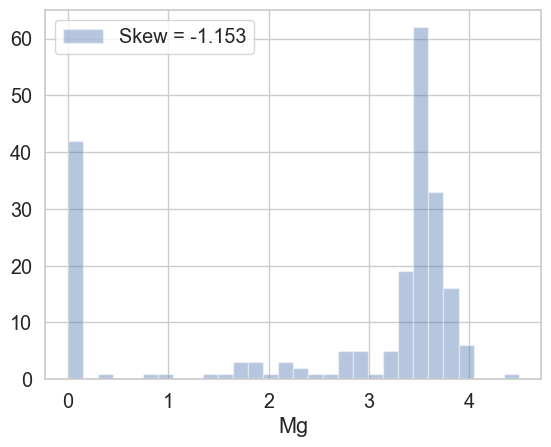

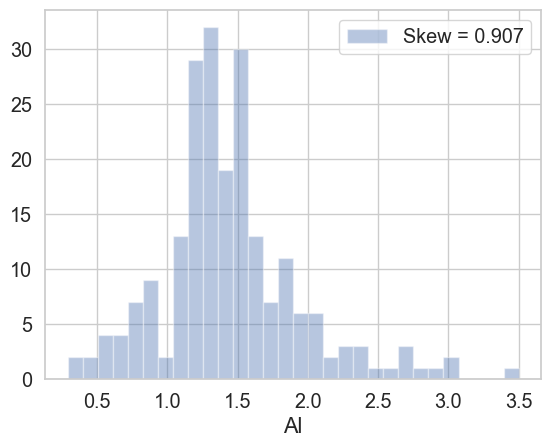

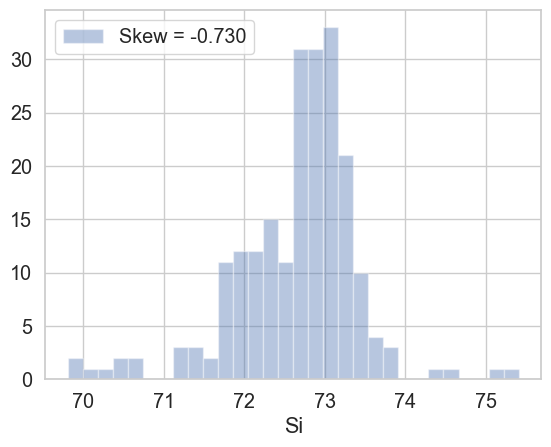

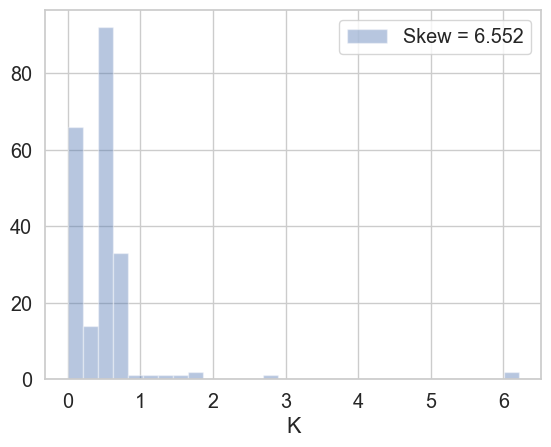

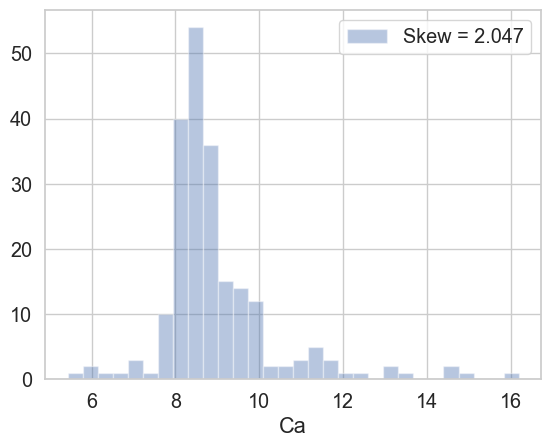

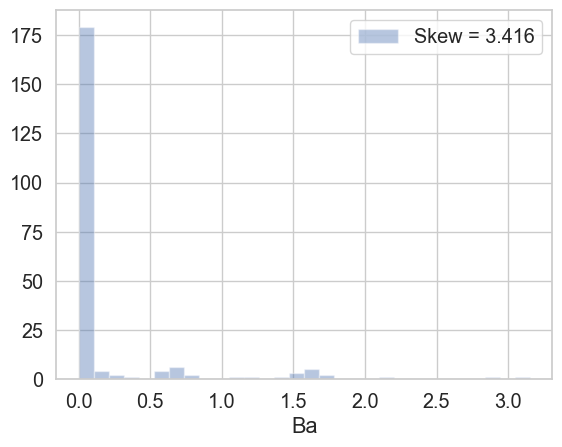

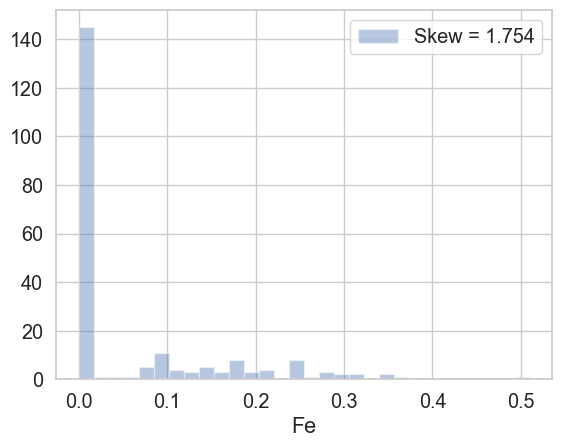

In [20]:


#Trying to gain more Insights about the data


for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
     




Outcomes

    The distribution of potassium (K) and Barium (Ba) seem to contain many outliers.
    The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients).
    None of the features follow Normal Distribution (are not normally distributed).




2. Using Multivariate Plots

<Figure size 800x800 with 0 Axes>

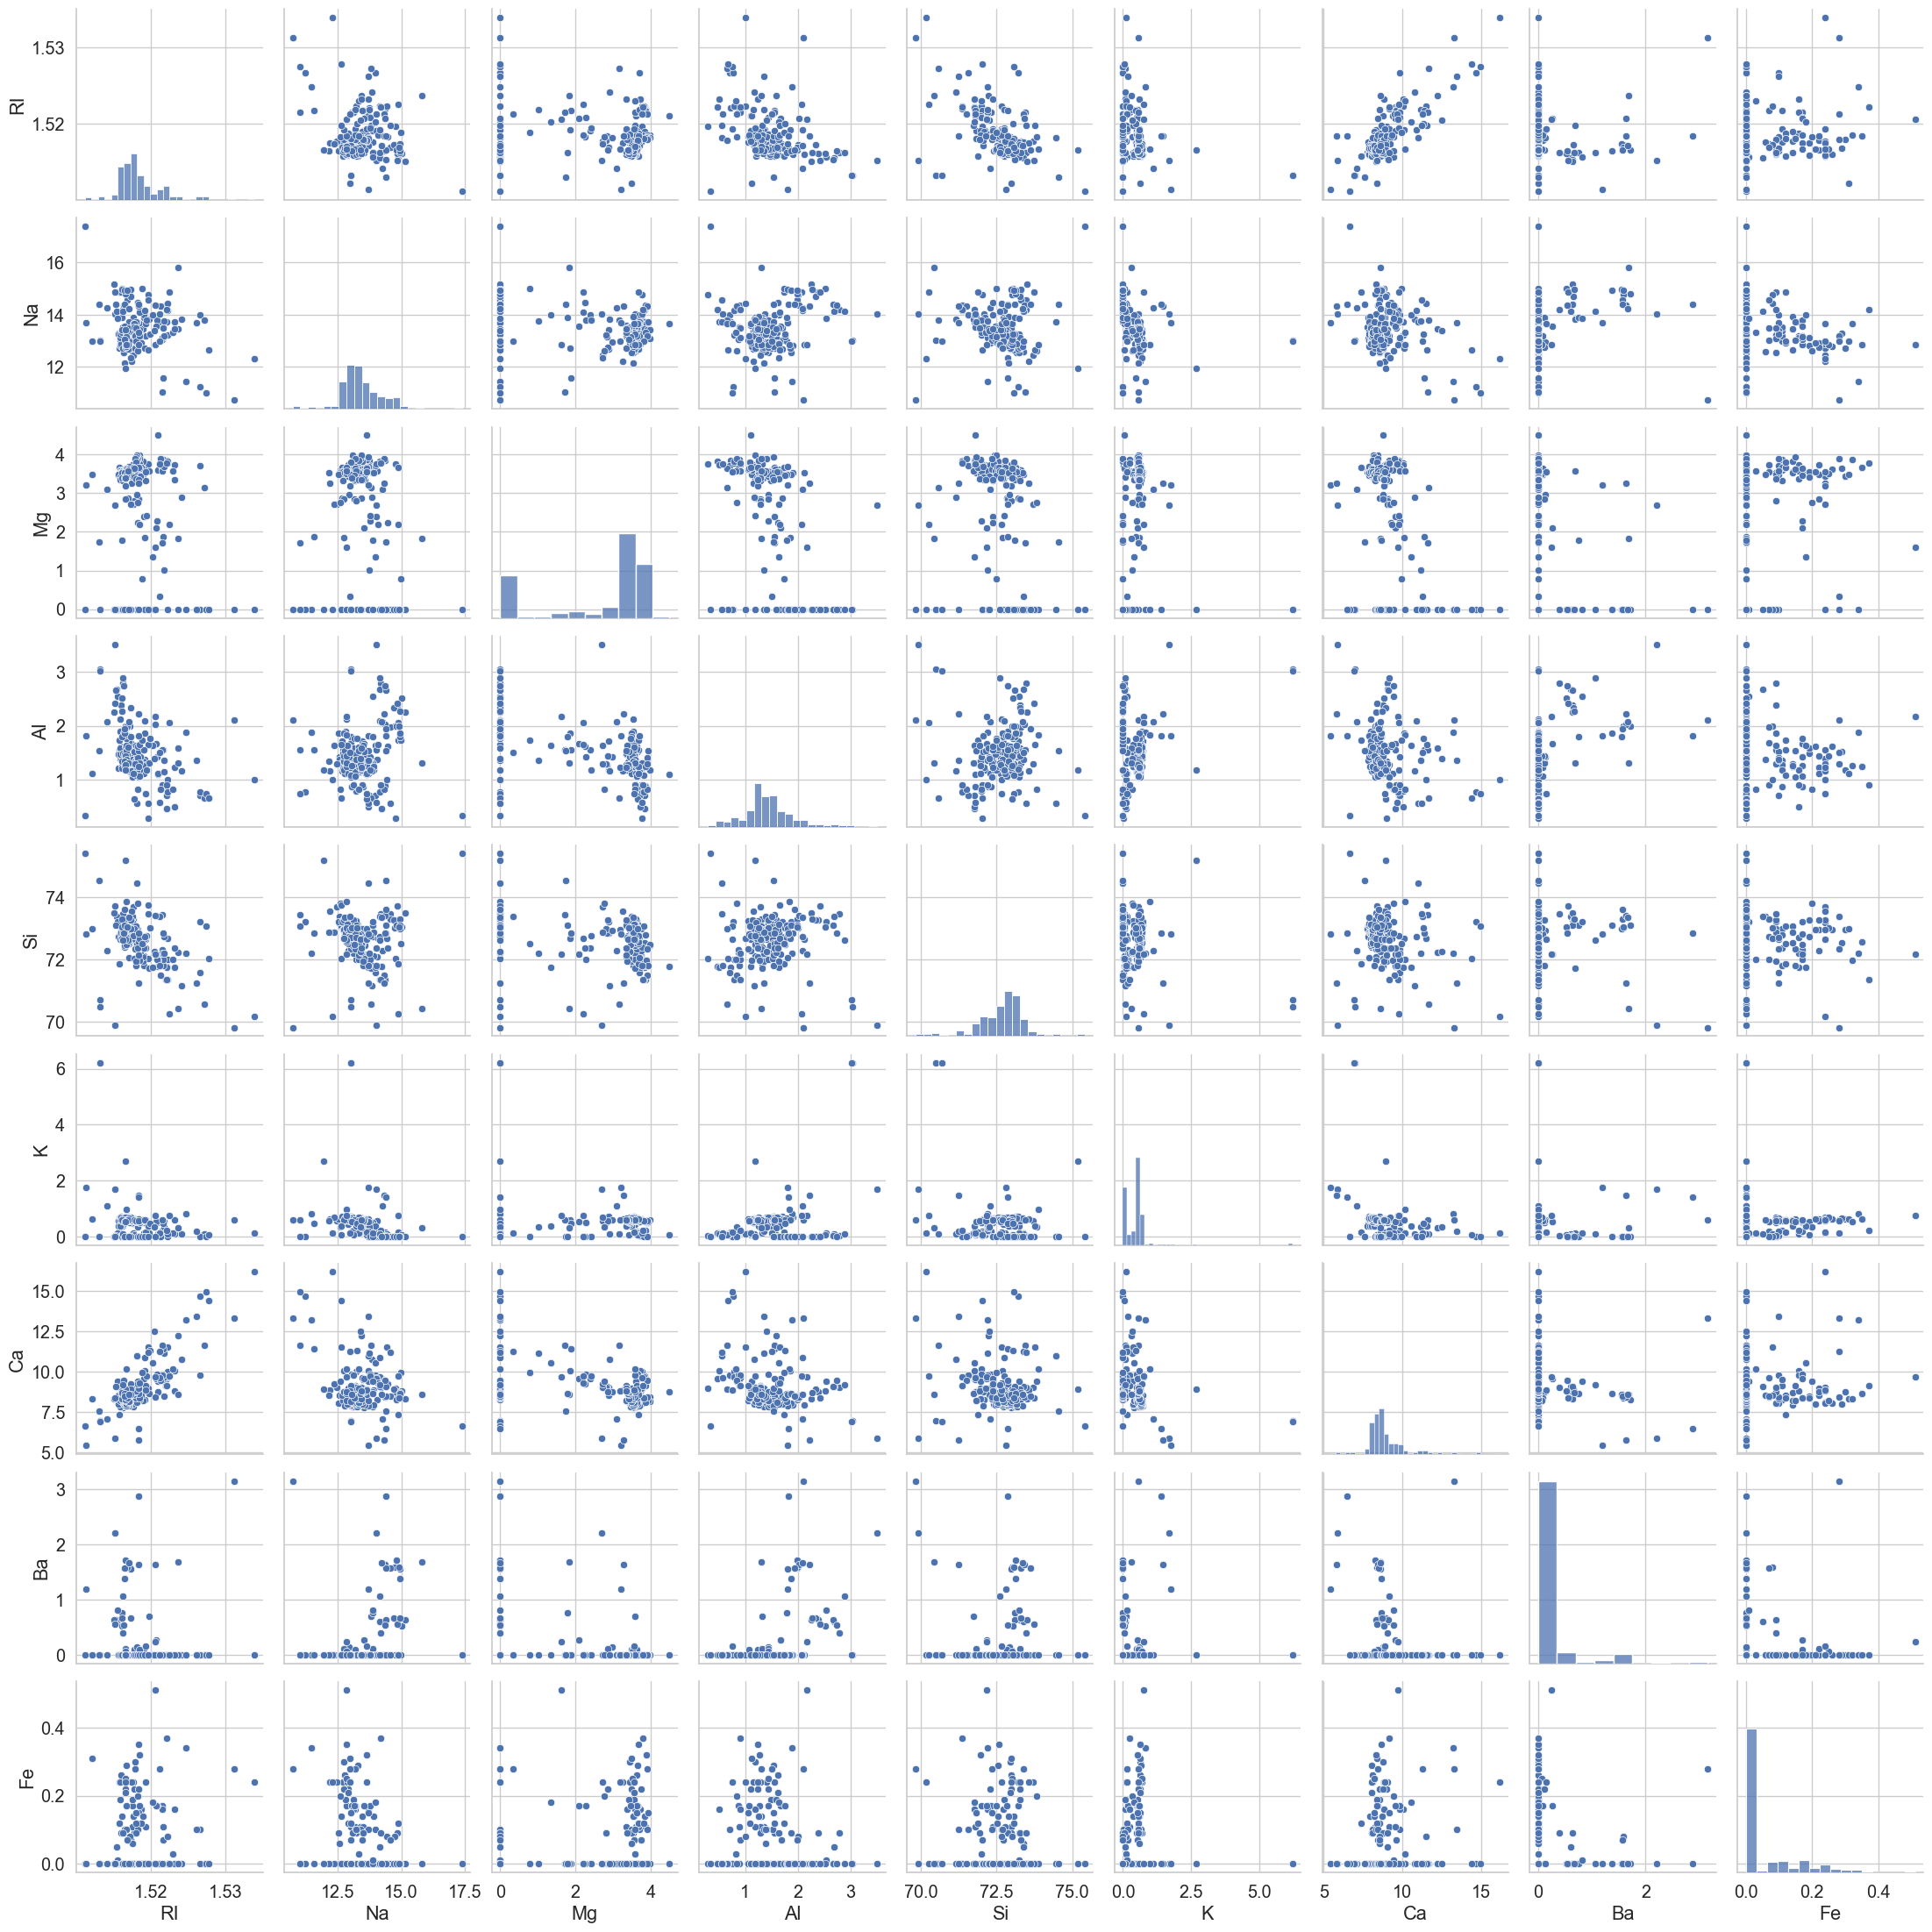

In [21]:


x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()
     


3. Using Correlation Matrix

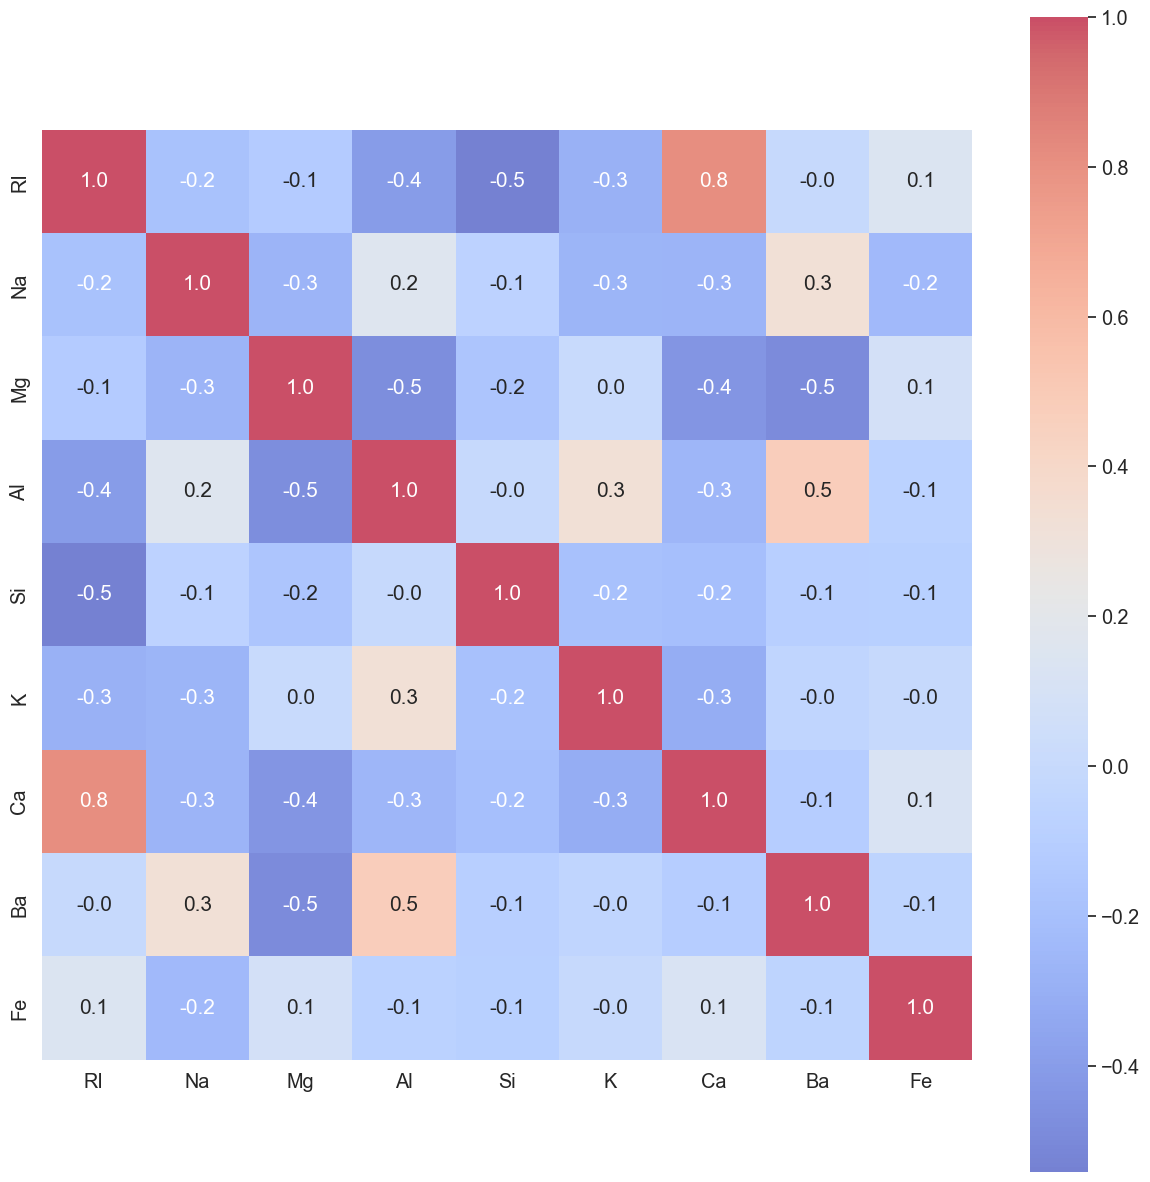

In [22]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()
     



Outcomes

    AI and Ba have intermediate correlation between each other.
    RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )




Outlier Detection

In [23]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    
    for col in df.columns.tolist():
       
        Q1 = np.percentile(df[col], 25)
        
       
        Q3 = np.percentile(df[col],75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        
        outlier_indices.extend(outlier_list_col)
        
   
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers



Data Treatment

In [24]:
#Information about data in hand 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Outcomes

    This dataset is clean; there aren't any missing values in it.

1. Removing Outliers

In [25]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 11)


Outcomes

    Removing observations with multiple outliers (more than 2) left us with 200 observations to train from.


2. Normalizing The Data

In [26]:
## normalizing/Scalling the data in [0,1] Range 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
    

In [27]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [28]:
y.head(2)

,Type
0,1
1,1


3. Scaling The Features

In [29]:



from sklearn import preprocessing
X=preprocessing.scale(X)
     



Visualization of Data after Being Preprocessed

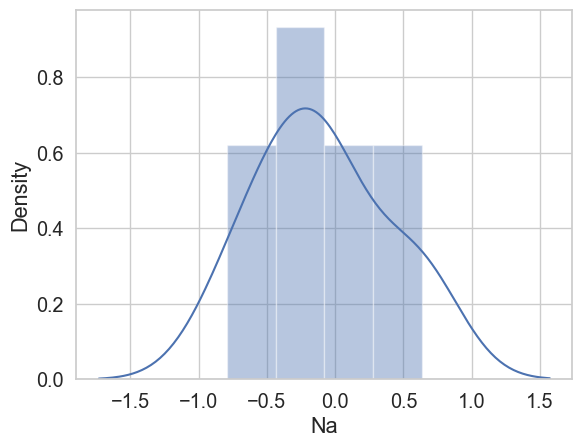

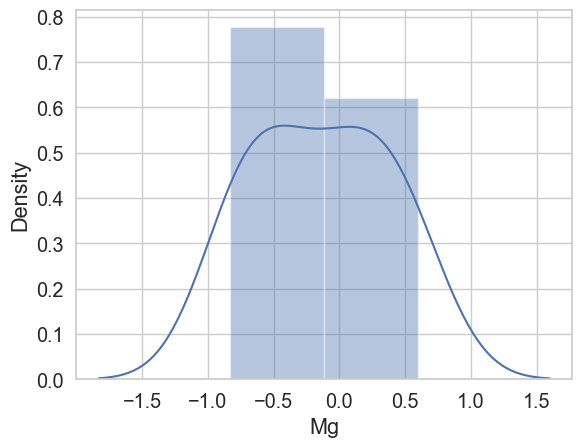

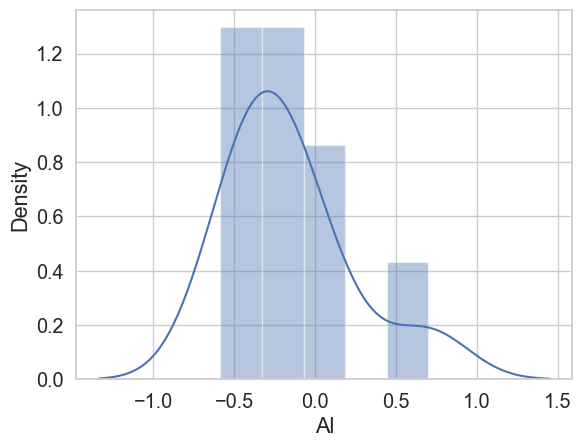

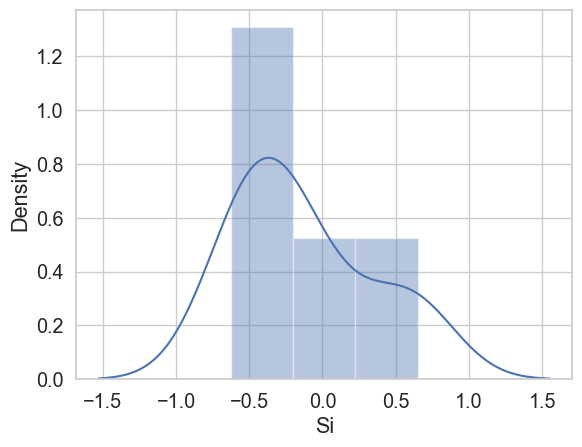

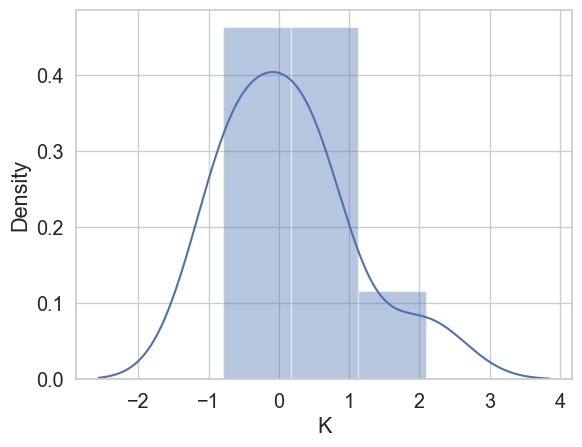

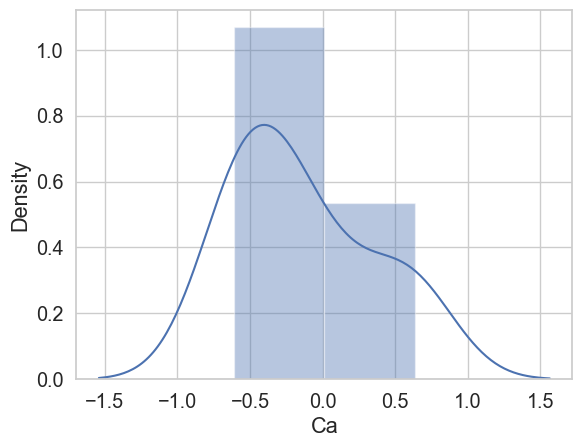

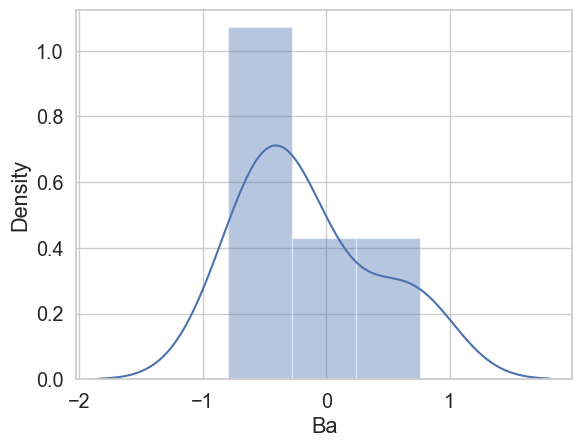

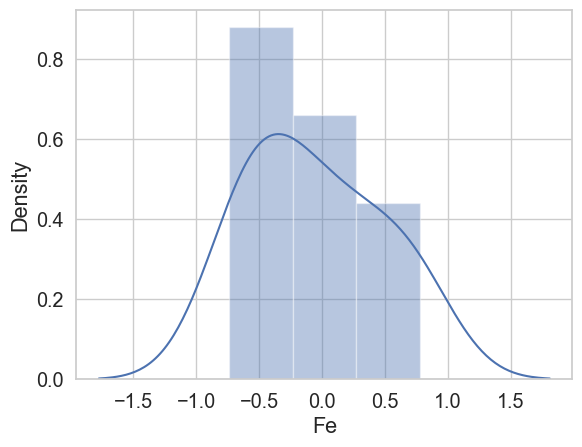

In [30]:
x2 = X


for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()



Outcomes

According to Diagrams above, After preprocessing,

    Skewness is reduced.
    Data is more normalized.




Training set - Test set Split

In [58]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))
     


Shape of X_train = (150, 5)
Shape of X_test = (50, 5)
Shape of y_train = (150,)
Shape of y_test = (50,)



Training Different Machine learning Models
*1. K-Nearest Neighbors*

In [59]:



Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)
     


0.6733333333333333
[0.72, 0.66, 0.7, 0.7, 0.66, 0.62, 0.64, 0.64, 0.68]



*2. Decision Tree*

In [60]:



Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

     


1.0
[0.6]



*3. Logistic Regression*

In [61]:



Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)
     


0.6666666666666666
[0.68]



*4. SVM Classifier (Non-Linear)*

In [62]:



Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)
     


0.7333333333333333
[0.74]


In [63]:
# Prediction
prediction = svc.predict(X_test)

In [64]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,7,7
2,2,2
3,2,1
4,1,1


Summary

Out of all above models:

Decision Tree

Decision tree is overfitting with :->

Training accuracy: 1.0

Testing accuracy: 0.7037037037037037

SVM (Non Linear Kernal)

SVM (Non Linear Kernal) is giving best result with:

Training accuracy: 0.76875

Testing accuracy: 0.7407407407407407

# MODEL BUILDING USING PCA



As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a 
classification technique and not regression, we cannot simply remove the collinear variables from the model, as they 
might be able to explain the difference between the target labels.

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. 
This is valuable as it can help in dimension reduction and lower the cost of data collection.


                      P1    P2    P3    P4    P5    P6    P7   P8   P9
Explained_Variance  2.47  0.96  0.56  0.14  0.06  0.04  0.01  0.0  0.0


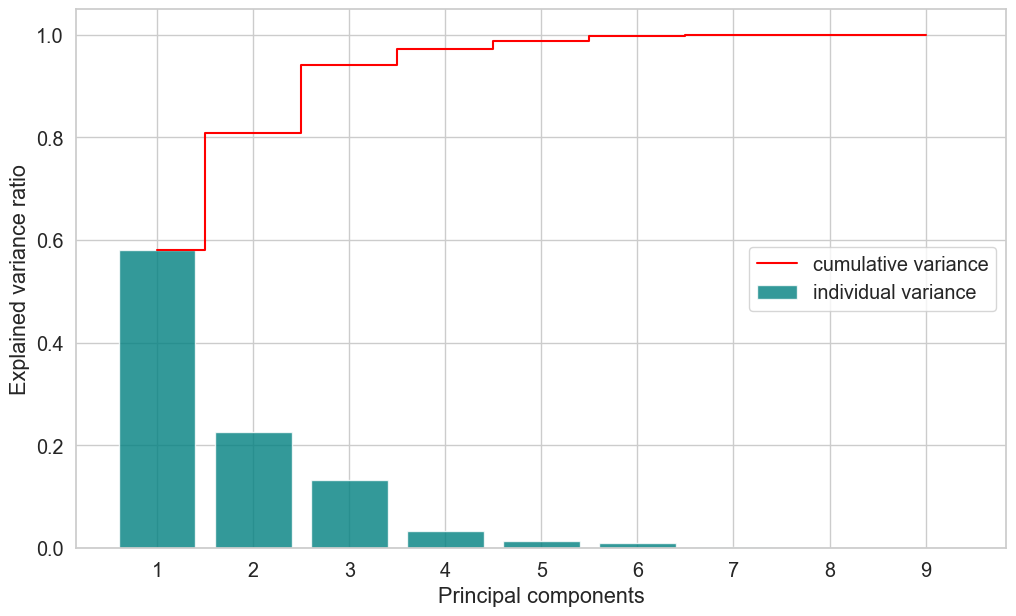

In [36]:


# Performing PCA
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()



The first 5 components account for about 99% of the total explained variance. We can run the analysis again only
with these five components.

In [37]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)



Now that we have our features and target labels, let us proceed to model development.


Model Development

In [38]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = df["Type"]

In [39]:


# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))



[1 2 3 5 6 7]
[1 2 3 5 6 7]


Testing Candidate models

In [40]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
#xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
#xgbMod.fit(X_train,y_train)
#y_pred = xgbMod.predict(X_test)
#sc2 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [41]:


print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
#print(xgbMod.feature_importances_)
print(gbmMod.feature_importances_)



[0.28474809 0.32552641 0.04367753 0.18082628 0.1652217 ]
[0.35901174 0.31144547 0.05063969 0.19482894 0.08407415]
[0.31700506 0.30285136 0.07781542 0.1722146  0.13011355]


In [42]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.700000
1,Gradient Boost,0.550000
2,Decision Tree,0.633333
3,Random Forest,0.633333


SVM gives the highest accuracy and all the features seem to be important from the other models. 
So, we will retain SVM as our final model and perform hyperparameter 
tuning to improve it.


Hyperparameter tuning-

In [43]:


tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)



Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}



Running final model

In [44]:


model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)



0.6833333333333333


Model Performance

Text(269.25, 0.5, 'predicted label')

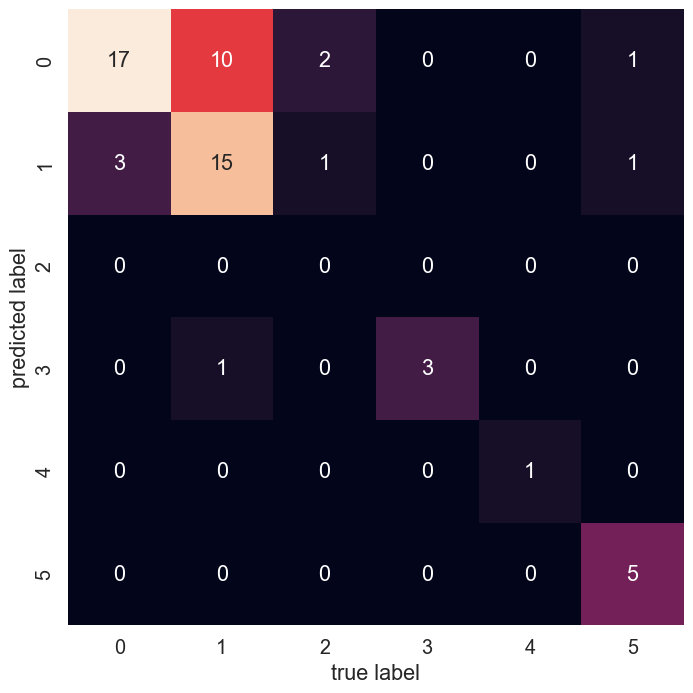

In [45]:


# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [46]:


print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.57      0.85      0.68        20
           2       0.75      0.58      0.65        26
           3       0.00      0.00      0.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         1
           7       1.00      0.71      0.83         7

    accuracy                           0.68        60
   macro avg       0.68      0.69      0.67        60
weighted avg       0.68      0.68      0.67        60



Creating an Interactive Component



This is where I create an Interactive component for the user to play around with the model. 
The first step is to train the model again with the entire dataset and the model and parameters that proved to 
be the best above. Then the user is presented with interactive sliders (with valid ranges based on the ditribution of 
        the original dataset). The final predicted class of the glass is shown below the sliders as the output. 
The user can refer to the table above the sliders to see which type does it belong to.


In [47]:
# Training the model with the entire data (Since cross-validation is already done)
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_var.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

In [48]:
 #Function to be invoked when the slider values are changed
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))


The Fun Part!

*Interact with the sliders to predict the glass type based on the slider values...*


In [49]:


# Change the values on the slider
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))



interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>


Conclusion

We see that overall model identifies most of the glass types correctly - type 1,2, 5 and 7, but not the rest. It could be due to the dataset being unbalanced in number of instances of each type. There is also some confusion among type 1, 2 and 3 which we had sensed while performing the EDA.

Learnings:

    nbextensions, slideshow in Jupyter Notebook
    Dimensionality reduction using PCA
    Hyperparamenter tuning using GridSearch
    Creating interactive components using ipywidgets
    Benefits of Glass identification! :)

Some Trade-off's:

    PCA dimensionality reduction resulted in slightly lower model scores. (Also, the intention was mainly to learn the technique, and performing PCA makes sense when you generally have big data problems (p>>n) for dimensionality reduction)
    Grid Search increased the accuracy by fine tuning the parameters but it is computationally expensive.

Reference

    https://archive.ics.uci.edu/ml/datasets/glass+identification
    http://www.davidpublisher.com/Public/uploads/Contribute/56f9de9b67f83.pdf
    https://www.researchgate.net/publication/228451484_Classification_and_Regression_by_RandomForest
    https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
    Sebastian Raschka, "Python Machine Learning", Chapter 3, A Tour of Machine Learning Classifiers Using Scikit-Learn

THANK YOU!

In [50]:
import joblib
joblib.dump(model,'glass_identification.pkl')

['glass_identification.pkl']

In [51]:
# Prediction
prediction = model.predict(X_test)

In [52]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,3
1,1,2
2,2,2
3,7,7
4,1,2
